# How can we control the increasing number of accidents in New York?

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Introduction

**Business Context.** The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). 

The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

**Analytical Context.** You are given a CSV file containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is `;` instead of the default `,`. You will be performing the following tasks on the data:

1. Extract data from Wikipedia
2. Read, transform, and prepare data for visualization
3. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:

1. How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

## Fetch borough data from Wikipedia

The client has requested analysis of the accidents-to-area ratio for boroughs. You will need to fetch the area of each borough from the Wikipedia page: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City.

Since we are fetching this resource from an external page, you should instead fetch the HTML document and store the results locally in a JSON file, so that you can parse it later when you need it. Create a folder named `data` and store the file inside it.

Insert **answer** below:

For later usage, let's store the borough data into a JSON file in the already created `data` folder:

In [2]:
import urllib
# Scrape data from website
site_url='https://en.wikipedia.org/wiki/Boroughs_of_New_York_City'
r = urllib.request.urlopen(site_url)
site_content = r.read().decode('utf-8')

# Saving scraped HTML to .html file (for later processing)
with open('data/saved_page.json', 'w',encoding='utf-8') as f:
    f.write(site_content)

# Use html.parser to create soup
s = BeautifulSoup(site_content, 'html.parser')

## Overview of the data

Now that we've stored the borough data in a JSON file, we can re-open it and use it whenever we wish. We can use the `read_json()` function in `pandas` to do that:

In [3]:
dfH = pd.read_html('data/saved_page.json',encoding='utf-8')
dfH[0]

New York City's five boroughsvte  \
                                      Jurisdiction   
                                           Borough   
0                                        The Bronx   
1                                         Brooklyn   
2                                        Manhattan   
3                                           Queens   
4                                    Staten Island   
5                                 City of New York   
6                                State of New York   
7  Sources:[5] and see individual borough articles   

                                                    \
                                                     
                                            County   
0                                            Bronx   
1                                            Kings   
2                                         New York   
3                                           Queens   
4                                         Richmond   
5                                 City of New York   
6                                State of New York   
7  Sources:[5] and see individual borough articles   

                                                    \
                                        Population   
                                Estimate (2017)[3]   
0                                          1471160   
1                                          2648771   
2                                          1664727   
3                                          2358582   
4                                           479458   
5                                          8622698   
6                                         19849399   
7  Sources:[5] and see individual borough articles   

                                                    \
                            Gross Domestic Product   
                                  billions(US$)[4]   
0                                           28.787   
1                                           63.303   
2                                          629.682   
3                                           73.842   
4                                           11.249   
5                                          806.863   
6                                         1547.116   
7  Sources:[5] and see individual borough articles   

                                                    \
                                                     
                                   per capita(US$)   
0                                            19570   
1                                            23900   
2                                           378250   
3                                            31310   
4                                            23460   
5                                            93574   
6                                            78354   
7  Sources:[5] and see individual borough articles   

                                                    \
                                         Land area   
                                      square miles   
0                                            42.10   
1                                            70.82   
2                                            22.83   
3                                           108.53   
4                                            58.37   
5                                           302.64   
6                                            47214   
7  Sources:[5] and see individual borough articles   

                                                    \
                                                     
                                          squarekm   
0                                           109.04   
1                                           183.42   
2                                            59.13   
3                                           281.09   
4                                           151.18   
5               

In [4]:
df = dfH[0].copy()
df.columns=['BOROUGH',
'COUNTRY',
'POPULATION',
'PRODUCTS PER BILLION',
'PRODUCTS PER CAPITA',
'LANDAREA SQM',
'LANDAREA SQKM',
'DENSITY PPL SQM',
'DENSITY PPL SQKM'
]
df

BOROUGH  \
0                                        The Bronx   
1                                         Brooklyn   
2                                        Manhattan   
3                                           Queens   
4                                    Staten Island   
5                                 City of New York   
6                                State of New York   
7  Sources:[5] and see individual borough articles   

                                           COUNTRY  \
0                                            Bronx   
1                                            Kings   
2                                         New York   
3                                           Queens   
4                                         Richmond   
5                                 City of New York   
6                                State of New York   
7  Sources:[5] and see individual borough articles   

                                        POPULATION  \
0                                          1471160   
1                                          2648771   
2                                          1664727   
3                                          2358582   
4                                           479458   
5                                          8622698   
6                                         19849399   
7  Sources:[5] and see individual borough articles   

                              PRODUCTS PER BILLION  \
0                                           28.787   
1                                           63.303   
2                                          629.682   
3                                           73.842   
4                                           11.249   
5                                          806.863   
6                                         1547.116   
7  Sources:[5] and see individual borough articles   

                               PRODUCTS PER CAPITA  \
0                                            19570   
1                                            23900   
2                                           378250   
3                                            31310   
4                                            23460   
5                                            93574   
6                                            78354   
7  Sources:[5] and see individual borough articles   

                                      LANDAREA SQM  \
0                                            42.10   
1                                            70.82   
2                                            22.83   
3                                           108.53   
4                                            58.37   
5                                           302.64   
6                                            47214   
7  Sources:[5] and see individual borough articles   

                                     LANDAREA SQKM  \
0                                           109.04   
1                                           183.42   
2                                            59.13   
3                                           281.09   
4                                           151.18   
5                                           783.83   
6                                           122284   
7  Sources:[5] and see individual borough articles   

                                   DENSITY PPL SQM  \
0                                            34653   
1                                            37137   
2                                            72033   
3                                            21460   
4                                             8112   
5                                            28188   
6                                            416.4   
7  Sources:[5] and see individual borough articles   

                                  DENSITY PPL SQKM  
0                                            13231  
1                                        

In [5]:
CityOfNY = df[df['BOROUGH']=='City of New York'].reset_index()
StateOfNY = df[df['BOROUGH']=='State of New York'].reset_index()

In [6]:
print(CityOfNY.POPULATION)
print(StateOfNY.POPULATION)

0    8622698
Name: POPULATION, dtype: object
0    19849399
Name: POPULATION, dtype: object


In [7]:
df.drop([5,6,7],axis=0,inplace=True)
df

BOROUGH   COUNTRY POPULATION PRODUCTS PER BILLION  \
0      The Bronx     Bronx    1471160               28.787   
1       Brooklyn     Kings    2648771               63.303   
2      Manhattan  New York    1664727              629.682   
3         Queens    Queens    2358582               73.842   
4  Staten Island  Richmond     479458               11.249   

  PRODUCTS PER CAPITA LANDAREA SQM LANDAREA SQKM DENSITY PPL SQM  \
0               19570        42.10        109.04           34653   
1               23900        70.82        183.42           37137   
2              378250        22.83         59.13           72033   
3               31310       108.53        281.09           21460   
4               23460        58.37        151.18            8112   

  DENSITY PPL SQKM  
0            13231  
1            14649  
2            27826  
3             8354  
4             3132

Let's go through the columns present in the dataframe:

In [8]:
for i in df.columns:
    print(i)

BOROUGH
COUNTRY
POPULATION
PRODUCTS PER BILLION
PRODUCTS PER CAPITA
LANDAREA SQM
LANDAREA SQKM
DENSITY PPL SQM
DENSITY PPL SQKM


In [9]:
df2 = pd.read_csv('data/accidents.csv',delimiter=';',encoding='utf-8')
df2.head()

DATE   TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  09/26/2018  12:12     BRONX   10454.0  40.808987 -73.911316   
1  09/25/2018  16:30  BROOKLYN   11236.0  40.636005 -73.912510   
2  08/22/2019  19:30    QUEENS   11101.0  40.755490 -73.939530   
3  09/23/2018  13:10    QUEENS   11367.0        NaN        NaN   
4  08/20/2019  22:40     BRONX   10468.0  40.868336 -73.901270   

                     ON STREET NAME  NUMBER OF PEDESTRIANS INJURED  \
0                               NaN                              0   
1  FLATLANDS AVENUE                                              1   
2                               NaN                              0   
3  MAIN STREET                                                   0   
4                               NaN                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  ...  \
0                             0                          0  ...   
1                             0                          0  ...   
2                             0                          0  ...   
3                             0                          1  ...   
4                             0                          0  ...   

   CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                    Unspecified                            NaN   
4                    Unspecified                            NaN   

   CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5 COLLISION_ID  \
0                            NaN                           NaN      3988123   
1                            NaN                           NaN      3987962   
2                            NaN                           NaN      4193132   
3                            NaN                           NaN      3985962   
4                            NaN                           NaN      4192111   

  VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0               Sedan                                  NaN   
1               Sedan                                  NaN   
2               Sedan                                  NaN   
3                Bike  Station Wagon/Sport Utility Vehicle   
4               Sedan                                Sedan   

  VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                 NaN                  NaN                 NaN  
1                 NaN                  NaN                 NaN  
2                 NaN                  NaN                 NaN  
3                 NaN                  NaN                 NaN  
4                 NaN                  NaN                 NaN  

[5 rows x 24 columns]

In [10]:
for i,j in zip(df2.columns,range(len(df2.columns))):
    print(j+1,".",i)

1 . DATE
2 . TIME
3 . BOROUGH
4 . ZIP CODE
5 . LATITUDE
6 . LONGITUDE
7 . ON STREET NAME
8 . NUMBER OF PEDESTRIANS INJURED
9 . NUMBER OF PEDESTRIANS KILLED
10 . NUMBER OF CYCLIST INJURED
11 . NUMBER OF CYCLIST KILLED
12 . NUMBER OF MOTORIST INJURED
13 . NUMBER OF MOTORIST KILLED
14 . CONTRIBUTING FACTOR VEHICLE 1
15 . CONTRIBUTING FACTOR VEHICLE 2
16 . CONTRIBUTING FACTOR VEHICLE 3
17 . CONTRIBUTING FACTOR VEHICLE 4
18 . CONTRIBUTING FACTOR VEHICLE 5
19 . COLLISION_ID
20 . VEHICLE TYPE CODE 1
21 . VEHICLE TYPE CODE 2
22 . VEHICLE TYPE CODE 3
23 . VEHICLE TYPE CODE 4
24 . VEHICLE TYPE CODE 5


We have the following columns

1. **Borough**: The borough in which the accident occured
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the place of accidents
5. **DATE**: Date of the accident
6. **TIME**: Time of accident
7. **DATETIME**: The column we previously created with the combination of date and time
8. **LATITUDE**: Latitude of the accident
9. **LONGITUDE**: Longitude of the accident
10. **NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED**: Category wise injury
11. **NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED**: Category wise death
12. **ON STREET NAME**: Street where the accident occured
13. **TOTAL INJURED**: Total injury from the accident
14. **TOTAL KILLED**: Total casualties in the accident
15. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
16. **ZIP CODE**: zip code of the accident location

Let's go ahead and answer each of the client's questions.

## General checking and Cleaning the Dataset

As we can see, there are too many differences between the amount of data of each borough.

Let's check the null values

In [11]:
df2.describe()

ZIP CODE       LATITUDE      LONGITUDE  \
count  238452.000000  231544.000000  231544.000000   
mean    10865.578838      40.656873     -73.797699   
std       546.056571       1.632850       2.961521   
min     10000.000000       0.000000     -74.253930   
25%     10452.000000      40.666750     -73.973860   
50%     11208.000000      40.717007     -73.922770   
75%     11354.000000      40.765715     -73.864890   
max     11697.000000      40.912884       0.000000   

       NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
count                  238522.000000                 238522.000000   
mean                        0.054523                      0.000532   
std                         0.237834                      0.023250   
min                         0.000000                      0.000000   
25%                         0.000000                      0.000000   
50%                         0.000000                      0.000000   
75%                         0.000000                      0.000000   
max                         6.000000                      2.000000   

       NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
count              238522.000000             238522.000000   
mean                    0.023482                  0.000084   
std                     0.152835                  0.009157   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                     3.000000                  1.000000   

       NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  COLLISION_ID  
count               238522.000000              238522.000000  2.385220e+05  
mean                     0.178076                   0.000310  4.008044e+06  
std                      0.587479                   0.017848  1.084693e+05  
min                      0.000000                   0.000000  3.511951e+06  
25%                      0.000000                   0.000000  3.913739e+06  
50%                      0.000000                   0.000000  4.006476e+06  
75%                      0.000000                   0.000000  4.102648e+06  
max                     21.000000                   2.000000  4.195347e+06

In [12]:
df2.describe(include='object')

DATE    TIME   BOROUGH                    ON STREET NAME  \
count       238522  238522    238522                            153918   
unique         601    1440         5                              5221   
top     11/15/2018    0:00  BROOKLYN  ATLANTIC AVENUE                    
freq           708    3657     76253                              1797   

       CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
count                         237638                        198514   
unique                            55                            54   
top                      Unspecified                   Unspecified   
freq                           59307                        164775   

       CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
count                          13072                          2856   
unique                            31                             9   
top                      Unspecified                   Unspecified   
freq                           12522                          2784   

       CONTRIBUTING FACTOR VEHICLE 5 VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  \
count                            792              236801              182932   
unique                             6                 447                 459   
top                      Unspecified               Sedan               Sedan   
freq                             776               86879               62540   

       VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
count                12301                2716                 753  
unique                  84                  38                  21  
top                  Sedan               Sedan               Sedan  
freq                  4966                1187                 310

In [13]:
df2.isnull().sum()

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64

In [14]:
df2.isnull().mean()

DATE                             0.000000
TIME                             0.000000
BOROUGH                          0.000000
ZIP CODE                         0.000293
LATITUDE                         0.029255
LONGITUDE                        0.029255
ON STREET NAME                   0.354701
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003706
CONTRIBUTING FACTOR VEHICLE 2    0.167733
CONTRIBUTING FACTOR VEHICLE 3    0.945196
CONTRIBUTING FACTOR VEHICLE 4    0.988026
CONTRIBUTING FACTOR VEHICLE 5    0.996680
COLLISION_ID                     0.000000
VEHICLE TYPE CODE 1              0.007215
VEHICLE TYPE CODE 2              0.233060
VEHICLE TYPE CODE 3              0.948428
VEHICLE TYPE CODE 4              0.988613
VEHICLE TYPE CODE 5              0

In the above result, we can see how there are some data with more than the 90% of missing data.

Also the column "On street name" have more than 30% of missing data and for this analysis they are not so important data.


In [15]:
df2.drop(['ON STREET NAME'],
         axis=1,inplace=True)
df2.head(1)

DATE   TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  09/26/2018  12:12   BRONX   10454.0  40.808987 -73.911316   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  ...  \
0                          0                         0  ...   

   CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                            NaN                            NaN   

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5 COLLISION_ID  \
0                           NaN                           NaN      3988123   

  VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
0               Sedan                 NaN                  NaN   

  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                 NaN                 NaN  

[1 rows x 23 columns]

In [16]:
#Change Collision_id column for after use as the count of accidents

df2.rename(columns={'COLLISION_ID':'ACCIDENTS'},inplace=True)

As we see in the above description the columns Latitude and Longitude has a lot of 0' that don't show any location, so will be erased.

In [17]:
df2['LATITUDE'].replace(0,np.nan,inplace=True)
df2['LONGITUDE'].replace(0,np.nan,inplace=True)


In [18]:
listOfFeatures = ['VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5',
    'CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']
for i in listOfFeatures:
    df2[i].replace(np.nan,'NA',inplace=True)
df2.isnull().mean()

DATE                             0.000000
TIME                             0.000000
BOROUGH                          0.000000
ZIP CODE                         0.000293
LATITUDE                         0.030815
LONGITUDE                        0.030815
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003706
CONTRIBUTING FACTOR VEHICLE 2    0.000000
CONTRIBUTING FACTOR VEHICLE 3    0.000000
CONTRIBUTING FACTOR VEHICLE 4    0.000000
CONTRIBUTING FACTOR VEHICLE 5    0.000000
ACCIDENTS                        0.000000
VEHICLE TYPE CODE 1              0.007215
VEHICLE TYPE CODE 2              0.000000
VEHICLE TYPE CODE 3              0.000000
VEHICLE TYPE CODE 4              0.000000
VEHICLE TYPE CODE 5              0.000000
dtype: float64

In [19]:
before = df2.shape[0]
df2.dropna(axis=0,inplace=True)
after = df2.shape[0]
print('Erased Values = ',before-after)
print('Current Shape = ',df2.shape)

Erased Values =  9271
Current Shape =  (229251, 23)


In [20]:
df2.isnull().sum()


DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
ACCIDENTS                        0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64

## Answering the client's questions

### Part 1: Accidents over time

Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?

Insert **answer** below:

In [21]:
df2['YYYYMM'] = df2['DATE'].apply(lambda row: row.split('/')[2] + row.split('/')[0])

print(df2.YYYYMM.sort_values().head())
print(df2.YYYYMM.sort_values().tail())

238521    201801
230288    201801
230287    201801
230286    201801
230285    201801
Name: YYYYMM, dtype: object
9572     201908
9571     201908
9570     201908
9582     201908
13102    201908
Name: YYYYMM, dtype: object


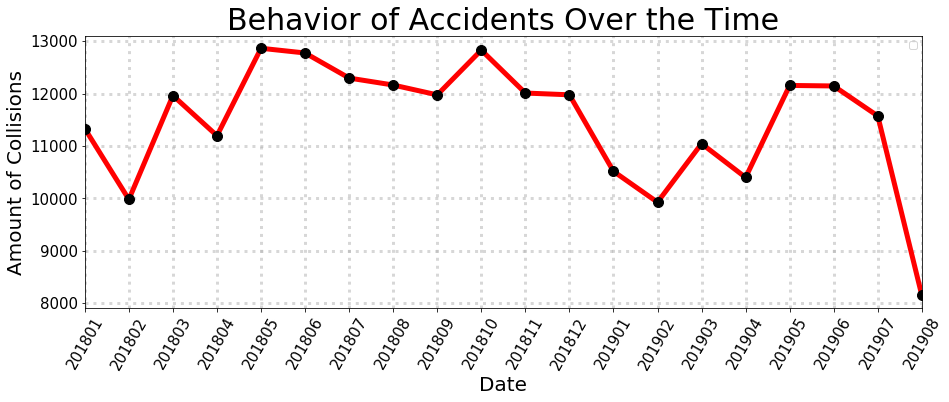

In [22]:
df2_amount_collision = df2[['YYYYMM','ACCIDENTS']].groupby('YYYYMM').count()
df2_amount_collision.plot(kind='line',color='r',figsize=(15,5),lw=5,marker='o',markersize=10,linestyle='-',mec='k',mfc='k')

plt.title('Behavior of Accidents Over the Time',fontsize=30)

plt.ylabel('Amount of Collisions',fontsize=20)
plt.yticks(fontsize=15)

plt.xlabel('Date',fontsize=20)
plt.xticks(ticks = np.arange(0,len(df2_amount_collision.index),1),
           labels = df2_amount_collision.index,fontsize=15,rotation=60)

plt.legend([])
plt.grid(alpha=0.5,ls=':',lw=3)

In [23]:
print('Minimum amount of accidents: ',df2_amount_collision['ACCIDENTS'].min())
print('Maximum amount of accidents: ',df2_amount_collision['ACCIDENTS'].max())

Minimum amount of accidents:  8145
Maximum amount of accidents:  12865


**Type your answer to the question in this cell**


As we can see in the graph, the number of accidents maintains a stable trend over time during 2018, in the year 2019, the number of accidents begins to decrease, reaching a low lvl at 2019-08.

### Part 2: Accident hotspots in a day

How does the number of accidents vary throughout a single day? Create a new column `HOUR` based on the data from the `DATETIME` column, then plot a bar graph of the distribution per hour throughout the day.

Insert **answer** below:

In [24]:
# Code here
df2['HOUR'] = df2['TIME'].apply(lambda row: int(row.split(':')[0]))
print(df2.HOUR.sort_values().head())
print(df2.HOUR.sort_values().tail())


26336     0
53648     0
104430    0
142633    0
104429    0
Name: HOUR, dtype: int64
165134    23
45321     23
158053    23
146267    23
189901    23
Name: HOUR, dtype: int64


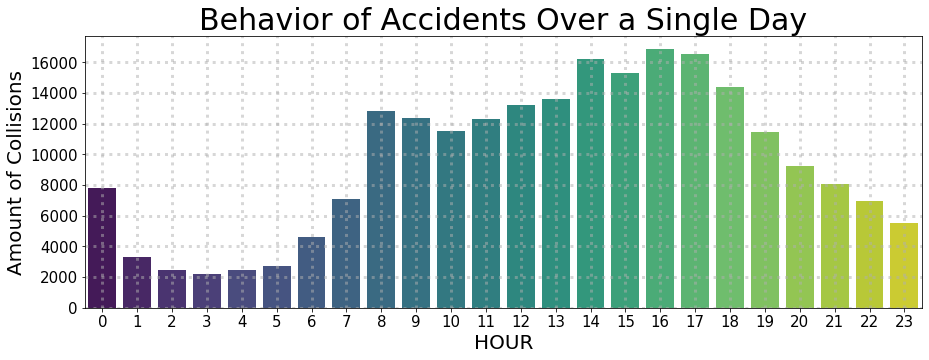

In [25]:
df2_amount_day = df2[['HOUR','ACCIDENTS']].groupby('HOUR',as_index=False).count().reset_index()
df2_amount_day['HOUR'] = df2_amount_day['HOUR'].astype('int')
df2_amount_day.sort_values('HOUR',inplace=True)
fig,ax = plt.subplots(figsize = (15,5))

ax = sns.barplot(x = 'HOUR',y = 'ACCIDENTS',data = df2_amount_day ,palette='viridis')

plt.title('Behavior of Accidents Over a Single Day',fontsize=30)

plt.ylabel('Amount of Collisions',fontsize=20)
plt.yticks(fontsize=15)

plt.xlabel('HOUR',fontsize=20)
plt.xticks(fontsize=15)

plt.grid(alpha=0.5,ls=':',lw=3)

In [26]:
print('Minimum amount of accidents: ',df2_amount_day['ACCIDENTS'].min())
print('Maximum amount of accidents: ',df2_amount_day['ACCIDENTS'].max())

Minimum amount of accidents:  2211
Maximum amount of accidents:  16883


**Type your answer to the question in this cell**

The Behavior of accidents throughout the day show us:

- In the early morning, the amount of accidents are so low.
- The worst scenary is in the evening, maybe a cause of the rush hour.
- After the rush hour, in the night it seems a decrease of accidents, but at the 0 hours are an small increase

### Part 3: Accidents by weekday

How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.

Insert **answer** below:

In [27]:
# Code here
df2['DATE'] = pd.to_datetime(df2['DATE'])

In [28]:
df2['WEEKDAY_NAME']=df2['DATE'].dt.day_name()
df2['WEEKDAY'] = df2['DATE'].dt.dayofweek
for i,j in zip(df2['WEEKDAY'].head(10),df2['WEEKDAY_NAME'].head(10)):
    print(i,"-",j)


2 - Wednesday
1 - Tuesday
3 - Thursday
1 - Tuesday
0 - Monday
5 - Saturday
5 - Saturday
6 - Sunday
4 - Friday
3 - Thursday


In [29]:
df2_weekday = df2[['WEEKDAY','WEEKDAY_NAME','ACCIDENTS']].groupby(['WEEKDAY','WEEKDAY_NAME'],as_index=False ).count()

In [30]:
df2_weekday['WEEKDAY_NAME']

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
6       Sunday
Name: WEEKDAY_NAME, dtype: object

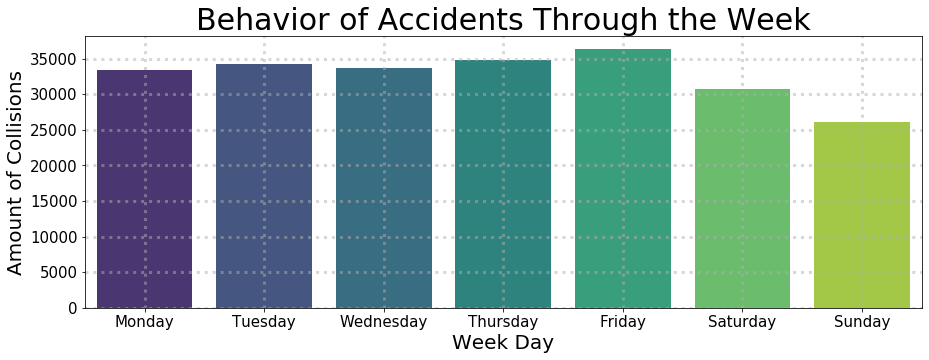

In [31]:
df2_weekday.sort_values('WEEKDAY',inplace=True)
fig,ax = plt.subplots(figsize = (15,5))

ax = sns.barplot(x = 'WEEKDAY',y = 'ACCIDENTS',data = df2_weekday ,palette='viridis')

plt.title('Behavior of Accidents Through the Week',fontsize=30)

plt.ylabel('Amount of Collisions',fontsize=20)
plt.yticks(fontsize=15)

plt.xlabel('Week Day',fontsize=20)
plt.xticks(fontsize=15,ticks = df2_weekday.index,labels=df2_weekday['WEEKDAY_NAME'])

plt.grid(alpha=0.5,ls=':',lw=3)

In [32]:
print('Minimum amount of accidents: ',df2_weekday['ACCIDENTS'].min())
print('Maximum amount of accidents: ',df2_weekday['ACCIDENTS'].max())

Minimum amount of accidents:  26124
Maximum amount of accidents:  36357


**Type your answer to the question in this cell**

Through the weeks, the accidents had a similar behavior with a growing trend, except on weekends, wee can see in the graph that on Saturday begins a decreasing behavior and stops on Monday.


### Part 4: Borough analysis

Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square kilometer per borough. What can you conclude?

Insert **answer** below:

In [33]:
# Code here
df2_borough = df2[['BOROUGH','ACCIDENTS']].groupby('BOROUGH',as_index=False).count()

df['BOROUGH'] = df['BOROUGH'].str.upper()
df['BOROUGH'].replace('THE BRONX','BRONX',inplace=True)

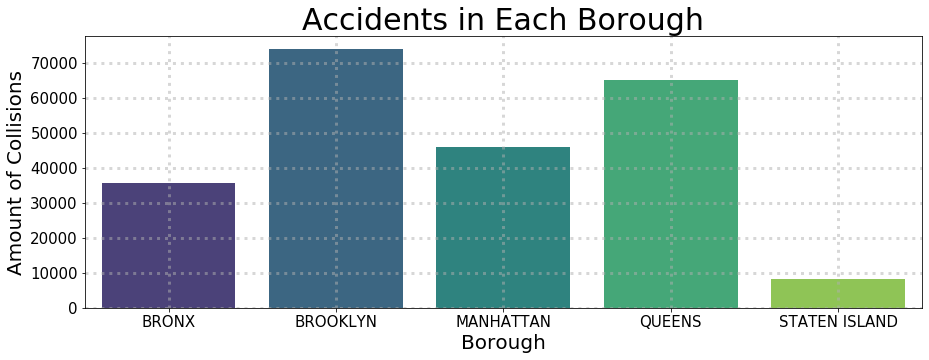

In [34]:
fig,ax = plt.subplots(figsize = (15,5))

ax = sns.barplot(x = 'BOROUGH',y = 'ACCIDENTS',data = df2_borough ,palette='viridis')

plt.title('Accidents in Each Borough',fontsize=30)

plt.ylabel('Amount of Collisions',fontsize=20)
plt.yticks(fontsize=15)

plt.xlabel('Borough',fontsize=20)
plt.xticks(fontsize=15)

plt.grid(alpha=0.5,ls=':',lw=3)

**Type your answer to the question in this cell**

Using only the information of the total accidents, we can see that there were more accidents in Brooklyn, however the information is inconclusive since it does not take into account the difference in territory of the different boroughs.


In [35]:
# Hint: update keys in borough data
# Hint: Since there are differences in the text used in the data and Wikipedia data, let's update it

We have now got the keys to match in the dictionary and the dataframe. The difference in case can be handled by making the mapping action case-insensitive. This can be done by either converting the dictionary keys to uppercase, or the dataframe data to lowercase.

Let's do that and plot `accidents_per_sq_km`, which is the accidents-to-area ratio:

In [36]:
# Code here
df_borough_merged = pd.merge(df2_borough,df[['BOROUGH','DENSITY PPL SQKM','LANDAREA SQKM','POPULATION']],how='inner',on='BOROUGH')
df_borough_merged['COLLISIONS PER SQKM'] = df_borough_merged['ACCIDENTS'].astype(float)/ df_borough_merged['LANDAREA SQKM'].astype(float)
df_borough_merged['COLLISIONS PER SQKM'] = df_borough_merged['COLLISIONS PER SQKM'].apply(lambda row: round(row,2))

In [37]:
reor_df_borough_merged = df_borough_merged[['BOROUGH','ACCIDENTS',
                                            'COLLISIONS PER SQKM','DENSITY PPL SQKM','POPULATION']]
reor_df_borough_merged

BOROUGH  ACCIDENTS  COLLISIONS PER SQKM DENSITY PPL SQKM POPULATION
0          BRONX      35771               328.05            13231    1471160
1       BROOKLYN      74013               403.52            14649    2648771
2      MANHATTAN      46063               779.01            27826    1664727
3         QUEENS      65074               231.51             8354    2358582
4  STATEN ISLAND       8330                55.10             3132     479458

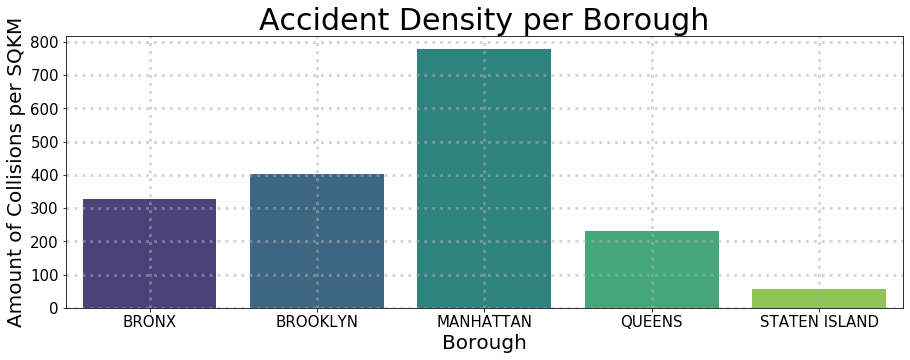

In [38]:
fig,ax = plt.subplots(figsize = (15,5))

ax = sns.barplot(x = 'BOROUGH',y = 'COLLISIONS PER SQKM',data = reor_df_borough_merged ,palette='viridis')

plt.title('Accident Density per Borough',fontsize=30)

plt.ylabel('Amount of Collisions per SQKM',fontsize=20)
plt.yticks(fontsize=15)

plt.xlabel('Borough',fontsize=20)
plt.xticks(fontsize=15)

plt.grid(alpha=0.5,ls=':',lw=3)

**Type your answer to the question in this cell**

Using the territory information, we can see than the correct behavior was different than the shown by the total amount of accidents.

In the graph, we can see that Manhatan had the most amount of accidents by squared kilometer, this makes sense because it's density person by squared kilometer is also the most one.

### Part 5: Borough hourly analysis

Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.

Insert **answer** below:

In [39]:
df2_borough_time = df2[['ACCIDENTS','BOROUGH','HOUR']].groupby(['BOROUGH','HOUR'],as_index=False).count()
df2_borough_time.sort_values(by='HOUR',inplace=True)
pivot_borough_time = df2_borough_time.pivot(index='BOROUGH',columns = 'HOUR')
pivot_borough_time


ACCIDENTS                                                   ...  \
HOUR                 0    1    2    3    4    5     6     7     8     9   ...   
BOROUGH                                                                   ...   
BRONX              1257  499  384  335  388  474   787  1331  2237  2074  ...   
BROOKLYN           2553  990  710  643  701  797  1323  2176  4041  4023  ...   
MANHATTAN          1888  930  655  571  524  532   894  1174  2136  2477  ...   
QUEENS             1948  828  662  598  772  855  1484  2165  3969  3402  ...   
STATEN ISLAND       186   88   74   64   65   67   145   232   468   417  ...   

                                                                           
HOUR             14    15    16    17    18    19    20    21    22    23  
BOROUGH                                                                    
BRONX          2448  2503  2812  2552  2194  1721  1369  1129   970   783  
BROOKLYN       5310  5078  5544  5477  4705  3660  3026  2608  2207  1723  
MANHATTAN      3175  2863  3035  2877  2653  2237  1882  1729  1636  1417  
QUEENS         4596  4284  4758  4952  4237  3426  2627  2324  1927  1472  
STATEN ISLAND   686   566   734   672   587   403   352   255   217   163  

[5 rows x 24 columns]

Text(0.5, 0.98, 'Borough Hourly Collisions')

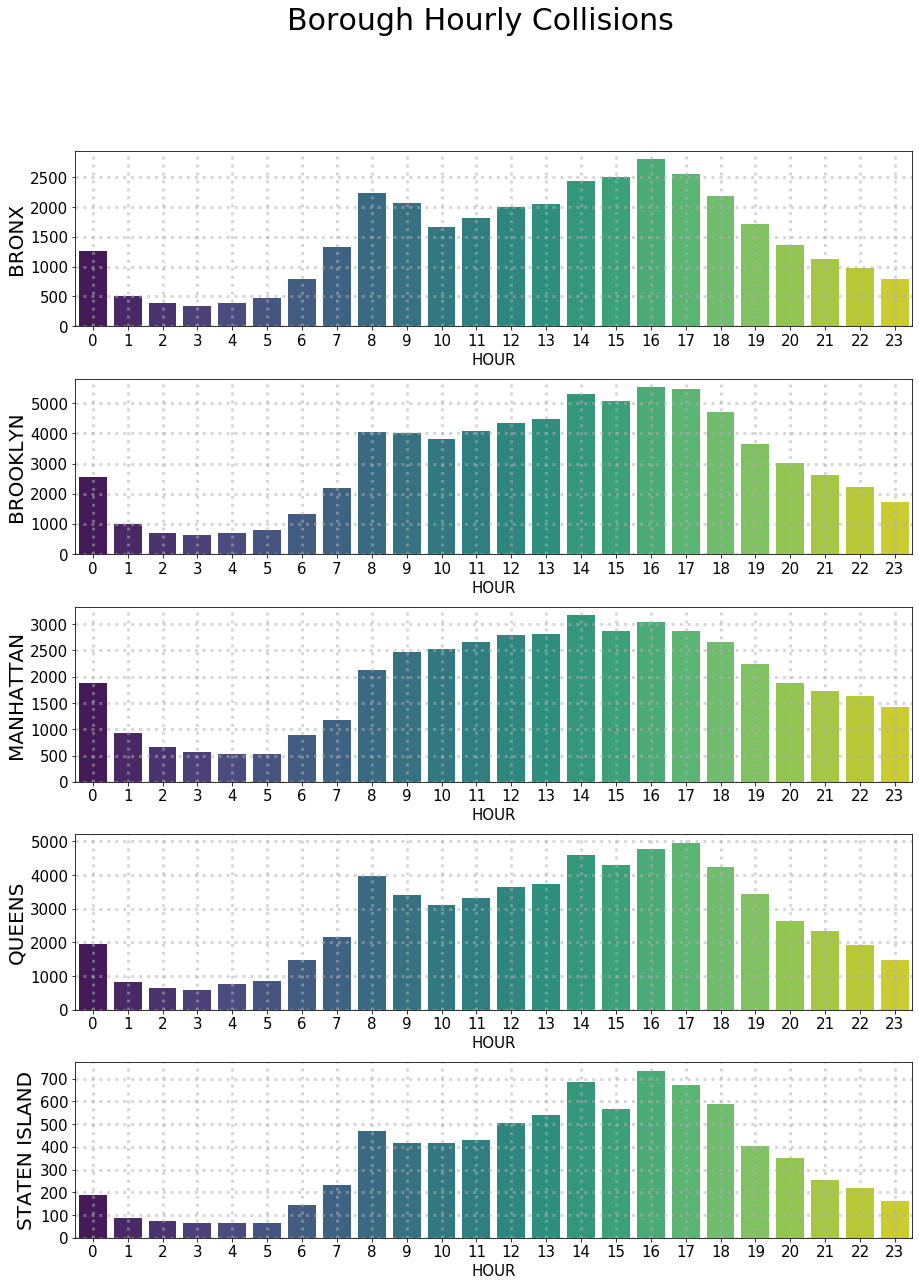

In [40]:
# Code here



fig=plt.figure(figsize=(15,20))

for i in range(len(pivot_borough_time)):
    plt.subplot(5,1,i+1)
    sns.barplot(x ='HOUR',y = 'ACCIDENTS',
                         data= df2_borough_time.loc[df2_borough_time['BOROUGH']==pivot_borough_time.index[i]],
               palette='viridis')
    plt.ylabel(pivot_borough_time.index[i],fontsize=20);plt.yticks(fontsize=15)
    plt.xlabel('HOUR',fontsize=15);plt.xticks(fontsize=15)
    plt.grid(alpha=0.5,ls =':',lw = 3)
    
    fig.subplots_adjust(hspace=0.3)
    
fig.suptitle('Borough Hourly Collisions',fontsize=30)





**Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?**

**Type your answer to the question in this cell**

The hourly behavior is similar in all the boroughs, adapted to the general trend, so there's no much to say about any independant borough's behavior

### Part 6: Cause of accidents

What factors cause the most accidents?

Insert **answer** below:

In [41]:
# Code here
list_of_factors = ['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']

df2_factors = df2[list_of_factors].apply(pd.value_counts)
df2_factors = df2_factors[df2_factors.index != 'NA']
df2_factors['TOTAL'] = df2_factors.sum(axis=1,skipna=True)
df2_factors.sort_values('TOTAL',ascending=False).head(10)

CONTRIBUTING FACTOR VEHICLE 1  \
Unspecified                                           57496.0   
Driver Inattention/Distraction                        56558.0   
Failure to Yield Right-of-Way                         17601.0   
Following Too Closely                                 14681.0   
Backing Unsafely                                      13462.0   
Passing Too Closely                                   10987.0   
Passing or Lane Usage Improper                        10092.0   
Other Vehicular                                        6936.0   
Unsafe Lane Changing                                   5628.0   
Turning Improperly                                     5803.0   

                                CONTRIBUTING FACTOR VEHICLE 2  \
Unspecified                                          159885.0   
Driver Inattention/Distraction                        13101.0   
Failure to Yield Right-of-Way                          2108.0   
Following Too Closely                                  2308.0   
Backing Unsafely                                       1144.0   
Passing Too Closely                                    1952.0   
Passing or Lane Usage Improper                         2348.0   
Other Vehicular                                        2919.0   
Unsafe Lane Changing                                    995.0   
Turning Improperly                                      716.0   

                                CONTRIBUTING FACTOR VEHICLE 3  \
Unspecified                                           12212.0   
Driver Inattention/Distraction                          106.0   
Failure to Yield Right-of-Way                             7.0   
Following Too Closely                                    94.0   
Backing Unsafely                                          6.0   
Passing Too Closely                                       8.0   
Passing or Lane Usage Improper                           18.0   
Other Vehicular                                         204.0   
Unsafe Lane Changing                                      5.0   
Turning Improperly                                        5.0   

                                CONTRIBUTING FACTOR VEHICLE 4  \
Unspecified                                            2725.0   
Driver Inattention/Distraction                            4.0   
Failure to Yield Right-of-Way                             NaN   
Following Too Closely                                     7.0   
Backing Unsafely                                          NaN   
Passing Too Closely                                       NaN   
Passing or Lane Usage Improper                            NaN   
Other Vehicular                                          45.0   
Unsafe Lane Changing                                      NaN   
Turning Improperly                                        NaN   

                                CONTRIBUTING FACTOR VEHICLE 5     TOTAL  
Unspecified                                             757.0  233075.0  
Driver Inattention/Distraction                            NaN   69769.0  
Failure to Yield Right-of-Way                             NaN   19716.0  
Following Too Closely                                     1.0   17091.0  
Backing Unsafely                                          NaN   14612.0  
Passing Too Closely                                       NaN   12947.0  
Passing or Lane Usage Improper                            NaN   12458.0  
Other Vehicular                                          11.0   10115.0  
Unsafe Lane Changing                                      NaN    6628.0  
Turning Improperly                                        NaN    6524.0

**Type your answer to the question in this cell**

The identified factors that cause the most accidents are:
- Driver Inattention
- Failure to Yield Right-of-Way
- Following Too Closely.

However, the most factors are Unspecified, it can be interpreted like a bad data capture, and can affect this study.

### Part 7: Boroughs and vehicle types

Which vehicle types are most involved in accidents per borough?

Insert **answer** below:

In [42]:
list_of_types = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']
for Vtype in list_of_types:
    print(df2[Vtype].unique()[0:20])

['Sedan' 'Station Wagon/Sport Utility Vehicle' 'ELECT' 'Taxi' 'Box Truck'
 'Ambulance' 'BS' 'Bike' 'Bus' 'Pick-up Truck' 'E-Sco' 'Van'
 'Tractor Truck Diesel' 'Flat Rack' 'AMBUL' '3-Door' 'Convertible'
 'Tractor Truck Gasoline' 'Dump' 'Stake or Rack']
['NA' 'Sedan' 'Van' 'Box Truck' 'Taxi'
 'Station Wagon/Sport Utility Vehicle' 'Bus' 'Com t' 'Bike'
 'Pick-up Truck' 'Moped' 'Flat Bed' 'Tractor Truck Diesel' 'Pallet'
 'Lift Boom' 'Motorcycle' 'Convertible' 'FORK' 'AMBUL' 'Motorscooter']
['NA' 'Sedan' 'Pick-up Truck' 'Tractor Truck Diesel' 'Box Truck'
 'Station Wagon/Sport Utility Vehicle' 'Bike' 'Van' 'Taxi' 'Motorcycle'
 'Dump' 'Motorbike' 'back' 'Tractor Truck Gasoline' 'TRAIL' 'PK' 'Bus'
 'Convertible' 'Moped' 'Lift Boom']
['NA' 'Sedan' 'Station Wagon/Sport Utility Vehicle' 'Convertible' 'Taxi'
 'Bus' 'Ambulance' 'Pick-up Truck' 'Box Truck' 'Bike' 'Dump'
 'Tractor Truck Diesel' 'Deliv' 'PK' 'TRAIL' 'Motorcycle' 'Carry All'
 'Moped' 'Van' 'SPRIN']
['NA' 'Motorcycle' 'Sedan' 'Station Wa

As can we see, some variables are wrongly named, so let's rename it

In [43]:
for Vtype in list_of_types:
    df2[Vtype] = df2[Vtype].str.upper()
    df2.loc[df2[Vtype]=='SPORT UTILITY / STATION WAGON',Vtype] = 'STATION WAGON/SPORT UTILITY VEHICLE'
    df2.loc[df2[Vtype]=='MOTORBIKE',Vtype] = 'MOTORCYCLE'
    df2.loc[df2[Vtype]=='BICYCLE',Vtype] = 'BIKE'

    

In [44]:

listOfTypes = []
for Vtype in list_of_types:    
    tempType = df2[[Vtype,'ACCIDENTS','BOROUGH']][(df2[Vtype]!= 'NA') & (df2['ACCIDENTS']>0) ].groupby([Vtype,'BOROUGH']).count().sort_values('ACCIDENTS',ascending=False)
    listOfTypes.append(tempType)
    
df2VehicleTypes = pd.concat(listOfTypes)
df2VehicleTypes = df2VehicleTypes.groupby(df2VehicleTypes.index).sum().sort_values('ACCIDENTS',ascending=False)
df2VehicleTypes


ACCIDENTS
(SEDAN, BROOKLYN)                                    50913
(STATION WAGON/SPORT UTILITY VEHICLE, BROOKLYN)      49962
(STATION WAGON/SPORT UTILITY VEHICLE, QUEENS)        49391
(SEDAN, QUEENS)                                      44872
(SEDAN, BRONX)                                       24560
...                                                    ...
(LIMOU, BRONX)                                           1
(LIVESTOCK RACK, BROOKLYN)                               1
(LOG, MANHATTAN)                                         1
(LP, MANHATTAN)                                          1
(Ï¿½MBU, BROOKLYN)                                       1

[1021 rows x 1 columns]

In [45]:
index = pd.MultiIndex.from_tuples(df2VehicleTypes.index)

In [46]:
df2VehicleSeries = pd.Series(df2VehicleTypes['ACCIDENTS'],index=index)

In [47]:
for borough in df2.BOROUGH.unique():
    print(borough,"\n","\n",df2VehicleSeries[:,borough][:5],"\n")

BRONX 
 
 SEDAN                                  24560
STATION WAGON/SPORT UTILITY VEHICLE    22825
PASSENGER VEHICLE                       6168
TAXI                                    2111
PICK-UP TRUCK                           2094
Name: ACCIDENTS, dtype: int64 

BROOKLYN 
 
 SEDAN                                  50913
STATION WAGON/SPORT UTILITY VEHICLE    49962
PASSENGER VEHICLE                      13175
PICK-UP TRUCK                           4043
TAXI                                    2861
Name: ACCIDENTS, dtype: int64 

QUEENS 
 
 STATION WAGON/SPORT UTILITY VEHICLE    49391
SEDAN                                  44872
PASSENGER VEHICLE                      11362
PICK-UP TRUCK                           3923
TAXI                                    2350
Name: ACCIDENTS, dtype: int64 

MANHATTAN 
 
 SEDAN                                  24408
STATION WAGON/SPORT UTILITY VEHICLE    23733
TAXI                                   13336
PASSENGER VEHICLE                       6546
B

**Type your answer to the question in this cell**

In every borough the most involved in accidents are the sedan vehicles and sport utility vehicle, at the top with similar values, after them, all the vehicle types had much less accidents


### Part 8: Death counts by vehicle type

Calculate the number of deaths by vehicle and plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?

Insert **answer** below:

In [48]:
df2['DEATHS'] = df2['NUMBER OF PEDESTRIANS KILLED'] + df2['NUMBER OF CYCLIST KILLED'] + df2['NUMBER OF MOTORIST KILLED']
listOfTypes = []
for Vtype in list_of_types:    
    tempType = df2[[Vtype,'DEATHS']][(df2[Vtype]!= 'NA') & (df2['DEATHS']>0) ].groupby([Vtype]).count().sort_values('DEATHS',ascending=False)
    listOfTypes.append(tempType)
    
df2_by_deaths = pd.concat(listOfTypes)
df2_by_deaths = df2_by_deaths.groupby(df2_by_deaths.index).sum().sort_values('DEATHS',ascending=False)

df2_by_deaths['PERCENTAGE'] = (df2_by_deaths['DEATHS']/df2_by_deaths['DEATHS'].sum())*100
df2_by_deaths['PERCENTAGE'] = df2_by_deaths['PERCENTAGE'].apply(lambda x: str(round(x,2))+"%"   ) 

df2_by_deaths_top = df2_by_deaths.iloc[:5]
df2_by_deaths_top

DEATHS PERCENTAGE
STATION WAGON/SPORT UTILITY VEHICLE     123     36.28%
SEDAN                                    76     22.42%
PASSENGER VEHICLE                        29      8.55%
MOTORCYCLE                               23      6.78%
BIKE                                     20       5.9%

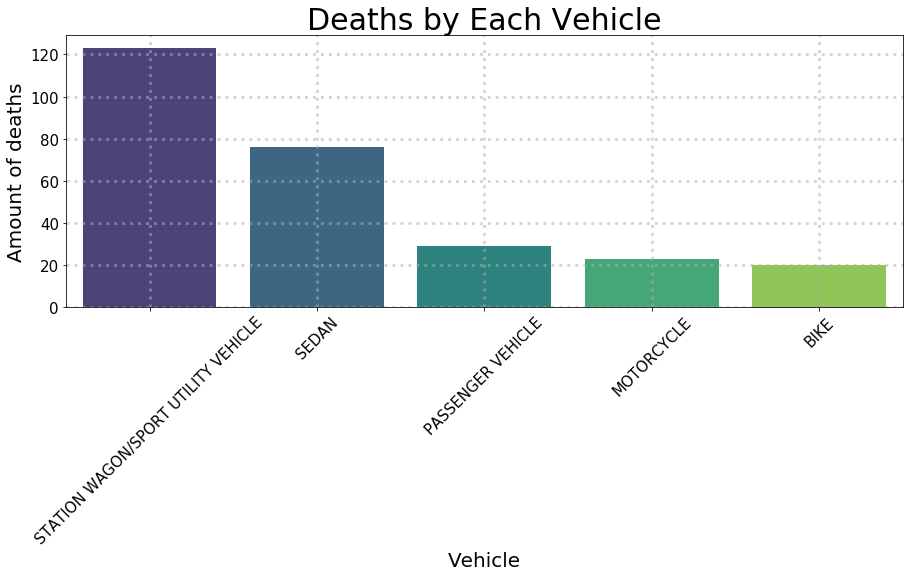

In [49]:
fig,ax = plt.subplots(figsize = (15,5))

ax = sns.barplot(x = df2_by_deaths_top.index,y = 'DEATHS',data = df2_by_deaths_top ,palette='viridis')

plt.title('Deaths by Each Vehicle',fontsize=30)

plt.ylabel('Amount of deaths',fontsize=20)
plt.yticks(fontsize=15)

plt.xlabel('Vehicle',fontsize=20)
plt.xticks(fontsize=15,rotation=45)

plt.grid(alpha=0.5,ls=':',lw=3)

**Type your answer to the question in this cell**

The Sport utility vehicle was the most involved in deaths, around of 6-7 times more than motorcycles and pick-up trucks, followed by the sedan, these both vehicles represent almost the 60% of the accident deaths.